<a href="https://colab.research.google.com/github/francisconetodata/study-ds/blob/master/Otimizacao_Lucro_Transporte_Carga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Otimização de Lucro no Transporte de Carga

### Bibliotecas

In [ ]:
!pip install geneticalgorithm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15077 sha256=b071ce935e7b41968f0c44acfe2ffb43839eff222cf43d789aea4e858b4c6f6c
  Stored in directory: /root/.cache/pip/wheels/07/e6/86/f23164d12c3134966614102db8e7956ab359faf7ffd78703ce
Successfully built func-timeout


In [ ]:
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga

### Dados

In [ ]:
data = pd.read_csv( "Itens.csv", sep=";")
data

,ID,PESO,VALOR,VOLUME
0,1,342,1136,32
1,2,305,5349,48
2,3,442,8487,26
3,4,944,4190,25
4,5,881,6644,47
5,6,183,3068,15
6,7,315,6675,40
7,8,450,5529,27
8,9,111,5905,40
9,10,676,7936,50


### Resumo de Dados

In [ ]:
print(f"Quantidade de Itens: {len(data)}")
print(f"Peso Total: {data['PESO'].sum()}")
print(f"Volume Total: {data['VOLUME'].sum()}")
print(f"Valor Total: {data['VALOR'].sum()}")

Quantidade de Itens: 20
Peso Total: 9205
Volume Total: 649
Valor Total: 115609


### Restrições

In [ ]:
sobra_peso = 6000
sobra_volume = 350
iteracao = 15

### Função de Avalição/Ajuste

In [ ]:
def fitness_function(X, data, max_volume, max_weight):
    selected_items = data.iloc[X.astype(bool), :]
    total_weight = selected_items['PESO'].sum()
    total_volume = selected_items['VOLUME'].sum()

    if total_weight > max_weight or total_volume > max_volume:
        return -1
    else:
        return -selected_items['VALOR'].sum()

### Configuração do algoritmo genético

In [ ]:
algorithm_param = {
    'max_num_iteration': iteracao,
    'population_size': 100,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
}

varbound = [[0, 1]] * len(data)

### Modelo

In [ ]:
model = ga(
    function=lambda X: fitness_function(X, data, sobra_volume, sobra_peso),
    dimension=len(data),
    variable_type='bool',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param
)

### Execução

 The best solution found:
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.]

 Objective function:
 -81655.0


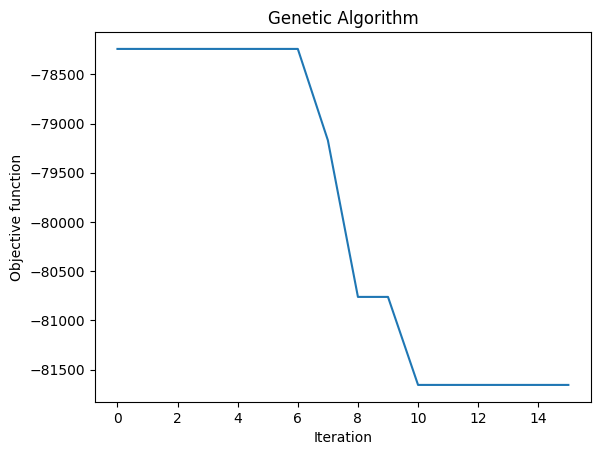

In [ ]:
model.run()

### Solução ótima

In [ ]:
solution = data.iloc[model.output_dict['variable'].astype(bool), :]

### Resultados

In [ ]:
# Exibir os resultados
print("\nResultados da Otimização:")
print(solution)
print(f"Quantidade Final: {len(solution)}")
print(f"Peso Final: {solution['PESO'].sum()}")
print(f"Volume Final: {solution['VOLUME'].sum()}")
print(f"Valor Total: {solution['VALOR'].sum()}")



Resultados da Otimização:
    ID  PESO  VALOR  VOLUME
2    3   442   8487      26
5    6   183   3068      15
6    7   315   6675      40
7    8   450   5529      27
8    9   111   5905      40
10  11   255   4307      16
11  12   515   8568      23
12  13   545   4498      24
13  14   909   8542      32
14  15   178   5084      39
15  16   410   9620      16
16  17    10   1749      32
18  19   753   9623      20
Quantidade Final: 13
Peso Final: 5076
Volume Final: 350
Valor Total: 81655
